  

**IMPORTANT: Before you do anything, save a copy of this notebook to your own google drive using the File -> Save a copy to Drive button in the menu. Otherwise you cannot save your changes. Once you've saved a copy to your own drive, it's available there just like a regular Google Docs file, and it is saved automatically.**

## **A. Tests for means**
### **Exercise A.1 (z-test)**
Now, we will have a look at a microarray gene expression data of 38 leukemia patients,
collected by Golub et al. [Golub TR et al., Science 1999]. In this data set, 27 patients are
diagnosed with acute lymphoblastic leukemia (ALL) and 11 with acute myeloid leukemia
(AML). The log10-transformed expression of 3051 genes across the 38 patients is stored in
golub.pkl, a dictionary with three variables: (1) data is the 3051×38 expression matrix, (2)
names is a vector of gene symbols, and (3) labels is a vector of class labels with 0
corresponding to ALL and 1 corresponding to AML.


To familiarize yourself with the data, run the following code to load the data and calculate the
average expression of the gene Gdf5 in the ALL and AML samples.


In [ ]:
import numpy as np
import pickle
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
!wget -nc https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/main/LST/golub.pkl
!wget -nc https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/main/LST/LST_Functions.py

from LST_Functions import ztest_1samp

--2024-11-14 13:58:56--  https://surfdrive.surf.nl/files/index.php/s/ugpzfpKdKWvDh9M/download
Resolving surfdrive.surf.nl (surfdrive.surf.nl)... 145.100.27.67, 145.107.8.140, 2001:610:108:203b:0:a11:da7a:5afe, ...
Connecting to surfdrive.surf.nl (surfdrive.surf.nl)|145.100.27.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15367 (15K) [text/x-python]
Saving to: ‘LST_Functions.py’

LST_Functions.py    100%[===================>]  15.01K  --.-KB/s    in 0s      

2024-11-14 13:58:56 (128 MB/s) - ‘LST_Functions.py’ saved [15367/15367]

--2024-11-14 13:58:56--  https://surfdrive.surf.nl/files/index.php/s/xL710QqqO7OCHa7/download
Resolving surfdrive.surf.nl (surfdrive.surf.nl)... 145.100.27.67, 145.107.8.140, 2001:610:108:203b:0:a11:da7a:5afe, ...
Connecting to surfdrive.surf.nl (surfdrive.surf.nl)|145.100.27.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7640109 (7.3M) [application/octet-stream]
Saving to: ‘golub.pkl’

golub.pkl    

In this exercise you need to write Python code to calculate the Z-statistic and the associated
p-value (using only basic functions).
Question A.1a: Calculate the Z-statistic and the corresponding p-value to test the hypothesis
that the average expression of gene Gdf5 (row number 2057) in the ALL samples is different
from zero. Assume that the standard deviation σ is equal to 0.25. Is the average expression of
Gdf5 in ALL samples significantly different from zero (using a significance level of 0.05)?


Hint: You can use `st.norm.sf` to calculate the p-value associated with the z-score. Look up
the [documentation online](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) or type
st.norm.sf? to understand how to use this function.

Use the `ztest_1samp` function from `LST_Functions` package to calculate the p-
value for the same test. Type `ztest_1samp?` to find out how to call it.



**Question A.1b**: Do you get the same results?

### **Exercise A.2 (t-test)**
In the previous exercise, we assumed we knew the standard deviation. In practice, we rarely
know it. In that case, we can estimate the true standard deviation from our samples and use
the t-test. In this exercise you need to write Python code to calculate the t-statistic and the
associated p-value (using only basic functions). You can use `st.t.sf` to calculate the p-value
associated with the t-statistic.


**Question A.2a**: Perform a one-sample t-test to test the null hypothesis that the average
expression of gene CCND3 (row number 1041) in the ALL samples is zero. Can you reject the
null hypothesis using a significance level of 0.05?

**Question A.2b**: Calculate the t-statistic and corresponding p-value using the Python function
`st.ttest_1samp`. Do you obtain similar results?


**Question A.2c**: Use the t-test to find how many genes have a significantly different average
expression in the ALL samples compared to the AML samples (using a significance level of
0.05). Assume unequal variances. Hint: Use the two-sample t-test function st.`ttest_ind`
(why?)


In [ ]:
with open('golub.pkl', 'rb') as f:
  datadict = pickle.load(f)
data = datadict['data']
genes = datadict['genes']
labels = datadict['labels']
# set the index of gene Gdf5 (it is the 2058th row, but we start from 0)
gene_idx = 2057
# get the expression data of Gdf5
a = data[gene_idx, :]
# obtain the labels of each class
ALL = np.where(labels == 0)[0]
AML = np.where(labels == 1)[0]

## B. Tests for overlap in sets
**Exercise B.1 (Fisher's exact test) - EXTRA QUESTION (not required)**

In an experiment to identify genes related to Alzheimer's, researchers have tested 500 genes
in human samples. Among the 500 genes, 10 genes are known to be involved in calcium
signaling and 200 are known to be involved in apoptosis. The researchers have found a
significant association between 50 genes and Alzheimer's among which 6 belong to the
calcium signaling set and 20 belong to the apoptosis set. The researcher wants to know
whether genes involved in calcium signaling or apoptosis are more represented in their
selected set.

Hint: Look at the function `st.fisher_exact`.

In [ ]:
N = 500 # total number of genes
m = 50 # number of selected genes
S1 = 10 # number of genes involved in calcium signaling
k1 = 6 # number of genes in m and involved in calcium signaling
S2 = 200 # number of genes involved in apoptosis
k2 = 20 # number of genes in m and involved in apoptosis
p1 = 0 ## calcium signaling enrichment
p2 =  0 ## apoptosis enrichment

### **Exercise B.2 (Fisher's exact test)**
There may be a genetic basis for increased tasting abilities. Last year, researchers performed
a genome- wide association study (GWAS) to find the relationship between genetic variations
(single nucleotides) and several taste traits. Thousands of GWA studies have been performed
since their introduction one decade ago. You can read more about them for instance on
[Wikipedia](https://en.wikipedia.org/wiki/Genome-wide_association_study).

For one trait, enhanced bitter taste ability, the GWAS results from last year are as follows:

|   | **SNP_id: rs4988235**  |   |
|---|---|---|
|  **bitter**   | AA/AG  | GG  |
|  **Bitter_no** |  17 |  31 |
|  **Bitter_yes** |  7 |  9 |

Determine the association between bitter taste and the A allele using Fisher’s Exact Test. Is
the association significant? Use `st.fisher_exact`.


### **Exercise B.3 (Chi-square test)**
Repeat the previous exercise using the Pearson's Chi-square test. What is the p-value? Is the
association significant?

Hint: Use the Python function `st.chi2.sf` to calculate the p-value associated with X2 for
one degree of freedom.

### **Exercise B.4 (Gene Ontology enrichment) - EXTRA QUESTION (not required)**
If you want to characterise a set of genes, you can look for enriched gene ontology (GO) terms:
annotated properties of genes that are overrepresented in a gene set. There are many online
tools to do this.

Go to the ToppFun tool in [ToppGene](https://toppgene.cchmc.org/enrichment.jsp). Here
you can enter a list of gene identifiers to find enriched GO terms. Enter a gene set, either from
the t-test results of exercise A, or by selecting one of the example data sets. Click “start” to
perform the tests. Which statistical test is used by ToppGene?

## **C. Multiple testing**
Load the golub dataset you used in module 1. The following code will calculate the number
of differentially expressed genes between the ALL and AML samples using a t-test and plot
the distribution of the t-statistic and p-values. Next, we create a randomized dataset by
permuting the sample labels, and we repeat the experiment.

### **Exercise C.1 (Set of t-tests)**
**Question C.1a**: What are the numbers of differentially expressed genes in case of using the
real data and in case of using the randomized data?

**Question C.1b**: How can you explain the differentially expressed genes obtained using the
randomized data?

## **Exercise C.2 (Bonferroni correction, FWER )**
**Question C.2a**: Use a Bonferroni (FWER) corrected significance level to call differentially
expressed genes (using the real data). What is the new Bonferroni-corrected significance level
(alpha)?

**Question C.2b** How many genes are significant before and after correction? And in the
randomized dataset?

### **Exercise C.3 (FDR )**
**Question C.3a**: Use the Benjamini-Hochberg method (FDR) to correct for multiple testing.
How many genes are differentially expressed (take FDR = 0.05)? How does this number
compare to the number you got using the Bonferroni method? And in the randomized
dataset?

**Question C.3b** Use the statsmodels.sandbox.stats.multicomp.multipletests
function to correct for multiple testing using the Benjamini-Hochberg method. Do you get
the same results?

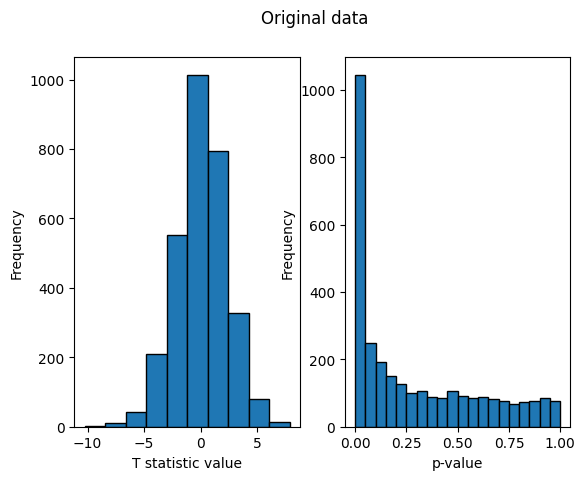

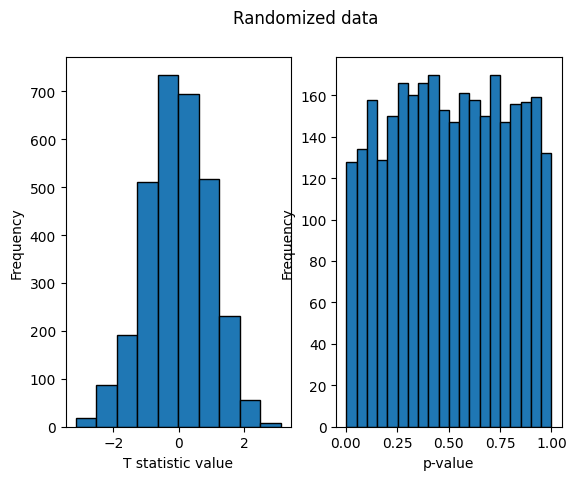

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
# Load the Golub data and define ALL and AML (indices of samples)
### ??? ###
# (1) t-test on the real data
# perform t-test for all genes
[T, pTtest] = st.ttest_ind(data[:, ALL], data[:, AML], axis=1,
equal_var=True)
# count the number of differentially expressed genes
dex_true = np.sum(pTtest< 0.05)
# plot the histogram of the t-statistics and p-values you calculated
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.hist(T, bins=10, edgecolor='k')
ax.set_xlabel('T statistic value')
ax.set_ylabel('Frequency')
ax = fig.add_subplot(1, 2, 2)
ax.hist(pTtest, bins=20, edgecolor='k')
ax.set_xlabel('p-value')
ax.set_ylabel('Frequency')
plt.suptitle('Original data')
# (2) t-test on the random data
# generate a new label vector (for now all labels are zero -> ALL)
l = np.random.permutation(labels)
# find the indices of the ALL and ALL samples
randALL = np.where(l == 0)[0];
randAML = np.where(l == 1)[0];
# apply the t-test to the random samples
[Trand, pRand] = st.ttest_ind(data[:, randALL], data[:, randAML], axis=1,
equal_var=True)
# count the number of differentially expressed genes
dex_rand = np.sum(pRand < 0.05)
# plot the histogram of the t-statistics and p-values you calculated
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.hist(Trand, bins=10, edgecolor='k')
ax.set_xlabel('T statistic value')
ax.set_ylabel('Frequency')
ax = fig.add_subplot(1, 2, 2)
ax.hist(pRand, bins=20, edgecolor='k')
ax.set_xlabel('p-value')
ax.set_ylabel('Frequency')
plt.suptitle('Randomized data')
plt.show()

## **D. EXTRA - Review previous knowledge**
The information below is intended as a short recap.

### **D1. Background on distributions and p-values**
Let us see, step by step how to calculate a p-value for the Z-test.

#### **The Normal Distribution - Probability density function**
Theory tells us that under the null hypothesis the Z-test statistic follows a Normal distribution
with mean 0 and standard deviation 1. Every continuous random variable can be described in
terms of its Probability Density Function (PDF), which describes the distribution of the random
variable (which values occur and how often). When a variable is normally distributed the PDF
takes the form of the well-known bell curve (Figure 1).

| ![Illustration of a standard normal distribution](https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/refs/heads/main/LST/module1/img/normal_dist.bmp) |
|:--:|
| **Figure 1**: Probability Density Function for a Normal distribution with mean 0 and standard deviation 1. |

Note that the value of the PDF for a specific value of the random variable x, PDF(x), is NOT
the probability of observing that value for the variable. Instead, the area under the curve of a
PDF relates to a probability. For example, the area under the PDF between -2 and 0.2
represents the probability of observing a value of X within the range [-2, 0.2], which for the
normal distribution is 0.557 (Figure 2). We write this as P(-2 ≤ X ≤ 0.2) = 0.557. Note that
a PDF is not always bell-shaped but depends on how the values of the random vari able are
distributed.

**Question 1**: The total area under a PDF is, however, always 1. Why is that?



| ![Area under normal distribution](https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/refs/heads/main/LST/module1/img/area_under_normal.bmp) |
|:--:|
| **Figure 2**: The area under the PDF of a normal distribution with mean $0$ and standard deviation $1$ from $-2.0$ to $0.2$.|


**The Normal Distribution - Cumulative distribution function**

For every distribution we can also define a Cumulative Distribution Function (CDF). The value
of the CDF at point x, CDF(x), corresponds to the area under the PDF until x by definition, or
in other words CDF(x) = P(X ≤ x). Figure 3a shows some examples of the CDF(x) and Figure
3b shows the complete CDF for the normal distribution. Note that the CDF values in Figure 3b
match the areas of Figure 3a.

**Question 2**: How would you calculate P(-2 ≤ X ≤ 0.2) from the CDF(x)?

| ![Several areas under PDF compared to CDF](https://raw.githubusercontent.com/brmprnk/LB2292/refs/heads/main/LST/module1/img/areas_vs_cdf.png) |
|:--:|
| **Figure 3**: (a) The area under the PDF of a normal distribution with mean $0$ and standard deviation $$ up until the points $-2$, $-1$, $0$ and $1$. (b) The CDF of a normal distribution with mean $0$ and standard deviation $1$. |

**1-sided p-value**

Now, let's calculate a p-value!
The p-value of a Z-statistic is defined as follows: “the probability of observing a Z-statistic <u>at
least as extreme </u>  as the one observed in the data in case the <u> null hypothesis is true </u> ”. To
understand what this means, assume we measure the expression of a gene in some patients.

We know that normally the average of the expression of that gene is 80 and the standard
deviation equals 10. If the expression of the gene for patients is not different than normal, we
would expect that for patients the average expression of the gene is also 80. In fact, this is our
null hypothesis: “The average expression of the gene in the patients **equals** the known average
expression in normal cases which equals 80 and has a standard deviation of 10”. Which we
can also state as follows:

H0: average expression in patients = 80

After measuring the expression across 25 patients we find an average of 82. The question now
is does this deviate from the expected? Is the difference with the normal average expression
of 80 unexpectedly large? This in fact is our alternative hypothesis, or H1 hypothesis:

H1: average expression in patients > 80

The z-statistic can be used to calculate how large the difference between the observed
average expression is with respect to the expected average expression based on our
knowledge, which is defined as:




**Question 3**: Show that Z-statistic for the example equals 1.

The z-statistic tells us what we would expect for the mean of observed expression values when
we do a certain number of observations GIVEN that the expression values are indeed normal.
Realize that in case the expression values are indeed normal, if we calculate the average of a
certain number of observations this will never be exactly equal to expected value (of 80 in our
case). But there will be small random variations, and it is exactly those variations that are
represented by the distribution of the Z-statistic. By design, the distribution of these Z-
statistics exactly equals a normal distribution N(0,1) as shown in Figure 1.


To answer whether the mean of observed expression values in the patients is unexpectedly
large we are thus interested in how probable it is to measure differences with the model mean
as large as we observed, i.e. the probability that we observe a Z-statistic is as large as we
observed, in our case: P(Z ≥ 1). This we have defined as the p-value: “the chance to observe
a similar mean as in our data or more extreme when the null-hypothesis is true”. For our
example: p-value = P(Z ≥ 1)
How do we calculate the p-value for our example, i.e. how do we calculate P(Z ≥ 1)? Realize
that the Z-statistic is normally distributed, so we know the PDF and CDF of Z. Also realize that
the total area under the PDF equals 1. Then P(Z ≥ 1) = 1 - P(Z ≤ 1). But remember
CDF(z) = P(Z ≤ z). Therefore,



| ![P-value for Z=1](https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/refs/heads/main/LST/module1/img/z_stat_1.jpg) |
|:--:|
| **Figure 4**: Graphical representation of the p-value for a Z-statistic of 1. |


Look at Figure 4 and make sure you understand why the above is true.



| ![CDF compared to SF](https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/refs/heads/main/LST/module1/img/cdf_sf.jpg) |
|:--:|
| **Figure 5**: The CDF (red) and the SF (green) of a normal distribution with mean 0 and standard deviation $1$. |




This function is also defined as the Survival Function (SF), i.e. :

> SF(x) = 1 - CDF (x)


The CDF and the SF of the Normal distribution are plotted in Figure 5.


| ![CDF compared to SF](https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/refs/heads/main/LST/module1/img/cdf_sf.jpg) |
|:--:|
| **Figure 5**: The CDF (red) and the SF (green) of a normal distribution with mean 0 and standard deviation $1$. |



The p-value for our example is SF(1) = 0.159 (Figure 4).


This means that there is a probability of about 16% that we indeed measure a mean of 82 or
higher when we do 25 observations, assuming that the expression of the gene is indeed
normal. In this case we are tempted to conclude that this is not an unexpectedly large
difference. When this p-value becomes very small this implies that the probability that we
observe that particular average becomes very unlikely when assuming the expression is
normal. Hence, for very small p-values we will conclude that we want to “reject the null hypothesis”. But what is very small? Typically, scientists consider that a p-value is small
enough if it is less than $\alpha$ = 0.05. This $\alpha$ is also called "confidence level" or "significance
level". Thus, in our case we can NOT significantly reject the null hypothesis, as our p-value = 0.159, which is larger than 0.05.

<span style="color: red;">**Caution**</span>: This does not mean that the null hypothesis is necessarily correct. We just don't have
enough evidence against it. Also, this does not mean that the null hypothesis has a probability
0.841 (1 - 0.159) of being true.

In our example we wanted to know whether the observed average expression is unexpectedly
larger than the model mean. We could have as well observed an average expression smaller
than the expected mean, say 78. In that case we are interested whether this observation is
unexpectedly smaller than 80, the expected average. Or in other words, the alternative
hypothesis would be:

H1: average expression in patients < 80

Again, we can use the Z-statistic to calculate how unexpected this observation is. Firstly, we
need to calculate the Z-statistic.

**Question 4**: Show that the Z-statistic in this case equals -1.

To say how unexpected this value is, we will need to know the probability of observing that Z-
statistic or smaller given that the average expression is normal: i.e. p-value = P(Z ≤ -1).

Note that in this case we are looking for Z-statistic values **smaller** than -1, whereas earlier we
were looking for Z-statistics **larger** than 1. This has to do with the fact that we are testing a
different alternative hypothesis! To calculate this p-value we should than not use the survival
function SF(z), but the cumulative distribution function CDF(z) which was defined as
P(Z ≤ z). Alternatively, because the Z-statistic is symmetric around zero (see Figure 1), we
can also get the p-value using the survival function for the **absolute** value of z: p-value = SF(|Z|)


To say how unexpected this value is, we need to know the probability of observing that Z-statistic or smaller given that the average expression is normal: i.e. $\text{p-value} = P(Z \leq 1)$. Note that in this case we are looking for Z-statistic values **smaller** than $-1$, whereas earlier we were looking for Z-statistics **larger** than $1$. This has to do with the fact that we are testing a different alternative hypothesis! To calculate this p-value we should then not use the survival function $SF(z)$, but the cumulative distribution function $CDF(z)$ which was defined as $P(Z \leq z)$. Alternatively, because the Z-statistic is symmetric around zero (see Figure 1), we can also get the p-value using the survival function for the **absolute** value of $z$: p-value $= SF(|Z|)$.

### 2-sided p-value

In the previous example, we had good reasons to suspect that the gene would be overexpressed in patients compared to the expected average. In many cases, however, we don't know in advance if the difference will be positive of negative and we just want to see if there is any difference with the expected average. In that case we are thus interested in whether the observed average is unexpectedly **larger OR smaller** than the expected average. The alternative hypothesis then becomes:

$$ H_1 \text{: average expression in patients } \neq 80 $$

Let us return to our initial example where we observed an average expression of $82$ in $25$ patients and got a Z-statistic of $1$. Before, we were only interested in Z-statistics at least as large as the observed one ($P(Z \geq 1)$). But, given our alternative hypothesis, we now need to include also deviations of the expected average that are equivalently smaller than the observed Z-statistic. That is, given the null hypothesis, how likely is it that we observe this difference with th expected mean? This includes Z-statistic values larger than $1$, or smaller than $-1$. Given this alternative hypothesis our p-value becomes:

$$ \text{p-value} = P(Z \leq -1 \text{ OR } Z \geq 1) = P(Z \leq -1) + P(Z \geq 1) $$

In other words, we are interested in the area under the PDF as shown in Figure 6. This is called a two-sided p-value, because we calculate areas on both the negative and the positive side of the PDF. Thi sarea can easily be calculated using the CDF and SF:

$$ \text{p-value} = P(Z \leq -1) + P(Z \geq 1) = CDF(-1) + SF(1) $$

Or only with the SF:


$$ \text{p-value} = P(Z \leq -1) + P(Z \geq 1) = SF(|-1|) + SF(1) = 2 \times SF(1) $$

| ![Two-sided p-value for Z=-1 and Z=1](https://raw.githubusercontent.com/DelftBioinformaticsLab/courses/refs/heads/main/LST/module1/img/two_sided.jpg) |
|:--:|
| **Figure 6**: Graphical representation of the two-sided p-value for a Z-statistic of $-1$ and $1$. Each of the two red-shaded areas has an area of $0.159$ |


---

#### ✏ Exercise 5

> What is the p-value for the given example (observed average of $82$ in $25$ patients) when considering the two-sided alternative hypothesis. And is this observation significantly extreme?

Write your answer below in [markdown](https://www.markdownguide.org/basic-syntax/), or upload a photo/scan of your handwritten solution.

**SOLUTION**:

...

---